<a href="https://colab.research.google.com/github/palakbh18/NLP_Assignment2/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import tensorflow
# Import the pandas library to read the dataset 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
# Import numpy 
import numpy as np
# Import nltk
import nltk 
import matplotlib.pyplot as plt
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
#Import the required libraries
import csv
import urllib.request as urllib2
# Importing data using the github url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

# Read the data and convert into dataframe
data = pd.read_csv(response,delimiter='\t',encoding='utf-8')
# Printing the first 10 rows of the dataset
data.head(10)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [0]:
data = data.sample(frac=1).reset_index(drop=True)


In [0]:
# Import train_test_split from sklearn and set the random state to 2003
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data ['Phrase'], data ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())

## Cleaning and pre processing the data
## Use a word tokenizer to tokenize the documents
for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 
X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 
# print a document
documents[0]

[['believable', 'and'], 3]

In [0]:
## Removing stop words and using lemmatizer to stem the words
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
## Using various parameters to remove stop words, stemming and lemmatizing
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [0]:
## Creating more refined and clean reviews
for l in range(len(documents)):                   
  label = documents[l][1]                         
  temp = []                                  
  for w in documents[l][0]:                       
    newWord = w                                   
    if remove_stopwords and (w in stopwords_en):  
      continue                                   
    if removePuncs and (w in punctuations):       
      continue                                    
    if useStemming: 
    ## Use Lancaster stemmer
      newWord = lancaster.stem(newWord)
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    temp.append(newWord)                 
## Removing the unprocessed reviews with clean refined reviews
  documents[l] = (temp, label)             
  documents[l] = (' '.join(temp), label) 


In [0]:
## Displaying sample of data documents
data = pd.DataFrame(documents, columns=['text', 'sentiment']) 
data.head()
X_train, X_test, Y_train, Y_test = train_test_split(data['text'],  data['sentiment'], test_size=0.3, random_state=2003)



In [0]:
### Using TF-IDF Vectorization
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2000,ngram_range=(1, 1)) 
X = vectorizer.fit_transform(data["text"]) 
Y = data['sentiment'] 

X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test

Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D


In [0]:
## Setting up parameters for training the model
num_classes = 5

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [0]:
# Defining functions for calculating various performance metrics
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
## Function for defining a convolutional model
from keras.models import Sequential
def cnnModelTrain():

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3,
                 activation='relu',
                 input_shape=(2000,1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(32, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(rate = 0.50))
    model.add(Flatten())
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
  # Define a method to feed inputs through the model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])
    return model    

In [0]:
model= cnnModelTrain()
model.summary()

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/100
109242/109242 [==============================] - 26s 235us/step - loss: 1.1146 - acc: 0.5628 - f1_m: 0.4935 - precision_m: 0.6228 - recall_m: 0.4137
Epoch 2/100
109242/109242 [==============================] - 25s 232us/step - loss: 1.0256 - acc: 0.5960 - f1_m: 0.5538 - precision_m: 0.6608 - recall_m: 0.4784
Epoch 3/100
109242/109242 [==============================] - 25s 231us/step - loss: 1.0061 - acc: 0.6018 - f1_m: 0.5651 - precision_m: 0.6655 - recall_m: 0.4924
Epoch 4/100
109242/109242 [==============================] - 26s 234us/step - loss: 0.9962 - acc: 0.6071 - f1_m: 0.5699 - precision_m: 0.6680 - recall_m: 0.4983
Epoch 5/100
109242/109242 [==============================] - 26s 235us/step - loss: 0.9895 - acc: 0.6074 - f1_m: 0.5737 - precision_m: 0.6678 - recall_m: 0.5041
Epoch 6/100
109242/109242 [==============================] - 25s 232us/step - loss: 0.9825 - acc: 0.6110 - f1_m: 0.5780 - precision_m: 0.6694 - recall_m: 0.5097
Epoch 7/100
109242/109242 [=======

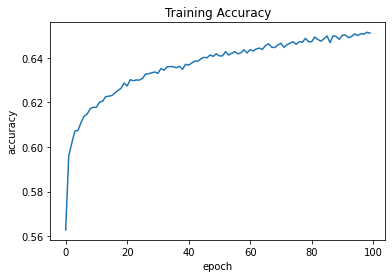

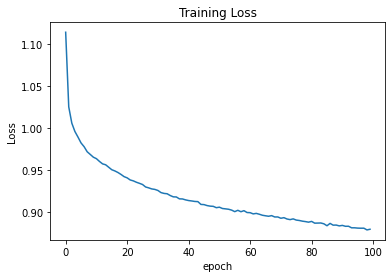

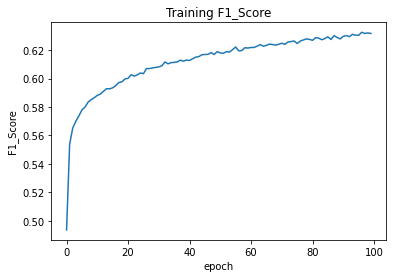

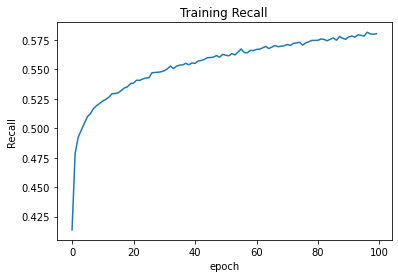

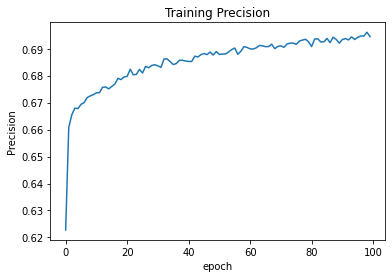

Inference time: 2532.7674 s


In [45]:
#### Calcaulte inference time
from time import time
start_time = time()
train_score=[]


history = model.fit(X_train, Y_train,batch_size=64,epochs=15,verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)
#score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test Precision:',precision)
print('Test Recall',recall)
print('Test F1_Score',f1_score)

print(history.history.keys())

## Plotting various metrics with epochs

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for Loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

# summarize history for F1_Score
plt.plot(history.history['f1_m'])
plt.title('Training F1_Score')
plt.ylabel('F1_Score')
plt.xlabel('epoch')
plt.show()

# summarize history for Recall
plt.plot(history.history['recall_m'])
plt.title('Training Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.show()


# summarize history for Precision
plt.plot(history.history['precision_m'])
plt.title('Training Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.show()

#### Time for training the model
time_taken = time() - start_time
print("Inference time: %.4f s" % time_taken)


In [46]:
# Serialize model to JSON
# Saving the model
model_json = model.to_json()
with open("1116552_1dconv_reg.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
from keras.models import model_from_json
# load the saved json and create model
json_file = open('1116552_1dconv_reg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model. model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
print('Test Precision:',precision)
print('Test Recall',recall)
print('Test F1_Score',f1_score)

Loaded model from disk


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Test loss: 1.0393064376473646
Test accuracy: 0.6101499423298731
Test Precision: 0.6507101260824895
Test Recall 0.5369515998120381
Test F1_Score 0.5874357935410551
